* 레이블링

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread('./data/circles.jpg')

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

ret, bgray = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)
ret, labels = cv2.connectedComponents(bgray)

dst = np.zeros(src.shape, dtype=src.dtype)

for i in range(1, ret):
    r = np.random.randint(256)
    g = np.random.randint(256)
    b = np.random.randint(256)
    dst[labels == i] = [b,g,r]

cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [23]:
src = cv2.imread('./data/circles.jpg')

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

ret, bgray = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(bgray)

dst = np.zeros(src.shape, dtype=src.dtype)
for i in range(1, ret):
    r = np.random.randint(256)
    g = np.random.randint(256)
    b = np.random.randint(256)
    dst[labels == i] = [b,g,r]
    
for i in range(1, ret):    
    x, y, width, height, area = stats[i] 
    cv2.rectangle(dst, (x, y), (x+width, y+height), (0,0,255))
    
    cx, cy = centroids[i]
    cv2.circle(dst, (int(cx), int(cy)), 5, (255, 0, 0), -1)
    
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()    

In [44]:
src = cv2.imread('./data/keyboard.bmp')

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

ret, bgray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(bgray)

dst = np.zeros(src.shape, dtype=src.dtype)
for i in range(1, ret):
    dst[labels == i] = [255,212,0]
    
for i in range(1, ret):    
    x, y, width, height, area = stats[i] 
    cv2.rectangle(dst, (x, y), (x+width, y+height), (0,0,255), 1)
    
cv2.imshow("src", bgray)    
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()    

* 외곽선 검출

In [56]:
src = np.zeros(shape=(512,512,3), dtype=np.uint8)
cv2.rectangle(src, (50, 100), (450, 400), (255, 255, 255), -1)
cv2.rectangle(src, (100, 150), (400, 350), (0, 0, 0), -1)
cv2.rectangle(src, (200, 200), (300, 300), (255, 255, 255), -1)

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

mode = cv2.RETR_LIST
method = cv2.CHAIN_APPROX_SIMPLE

contours, hierarchy = cv2.findContours(gray, mode, method)

for contour in contours:
    cv2.drawContours(src, [contour], 0, (255, 0, 0), 3)
    
cv2.imshow("src", src)
cv2.waitKey()
cv2.destroyAllWindows()      

In [57]:
src = cv2.imread("./data/contours.bmp")
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

mode = cv2.RETR_LIST
method = cv2.CHAIN_APPROX_SIMPLE

contours, hierarchy = cv2.findContours(gray, mode, method)

for contour in contours:
    cv2.drawContours(src, [contour], 0, (255, 0, 0), 3)
    
cv2.imshow("src", src)
cv2.waitKey()
cv2.destroyAllWindows()      

* 템플릿 매칭

In [73]:
src = cv2.imread("./data/alphabet.bmp", cv2.IMREAD_GRAYSCALE)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

template1 = cv2.imread("./data/S.bmp", cv2.IMREAD_GRAYSCALE)
# template2 = cv2.imread("./data/b.bmp", cv2.IMREAD_GRAYSCALE)
# template3 = cv2.imread("./data/A.bmp", cv2.IMREAD_GRAYSCALE)

r1 = cv2.matchTemplate(src, template1, cv2.TM_CCOEFF_NORMED)
# r1 = cv2.matchTemplate(src, template1, cv2.TM_CCORR_NORMED)
# r1 = cv2.matchTemplate(src, template1, cv2.TM_SQDIFF_NORMED)
# r2 = cv2.matchTemplate(src, template2, cv2.TM_CCOEFF_NORMED)
# r3 = cv2.matchTemplate(src, template3, cv2.TM_CCOEFF_NORMED)

minVal1, maxVal1, minLoc1, maxLoc1 = cv2.minMaxLoc(r1)
# minVal2, maxVal2, minLoc2, maxLoc2 = cv2.minMaxLoc(r2)
# minVal3, maxVal3, minLoc3, maxLoc3 = cv2.minMaxLoc(r3)

w1, h1 = template1.shape
# w2, h2 = template2.shape
# w3, h3 = template3.shape
cv2.rectangle(dst, maxLoc1, (maxLoc1[0]+h1, maxLoc1[1]+w1), (0,0,255), 2)
# cv2.rectangle(dst, maxLoc2, (maxLoc2[0]+h2, maxLoc2[1]+w2), (0,0,255), 2)
# cv2.rectangle(dst, maxLoc3, (maxLoc3[0]+h3, maxLoc3[1]+w3), (0,0,255), 2)

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows() 

In [82]:
src = cv2.imread("./data/circuit.bmp")
template = cv2.imread("./data/crystal.bmp")

r = cv2.matchTemplate(src, template, cv2.TM_CCOEFF_NORMED)
# r = cv2.matchTemplate(src, template, cv2.TM_CCORR_NORMED)
# r = cv2.matchTemplate(src, template, cv2.TM_SQDIFF_NORMED) # 이걸로 할땐 minLoc을 사용해야 함

minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(r)

w, h, _ = template.shape
cv2.rectangle(src, maxLoc, (maxLoc[0]+h, maxLoc[1]+w), (0,0,255), 2)

cv2.imshow("src", src)
cv2.waitKey()
cv2.destroyAllWindows() 

* 캐스케이드 분류기와 얼굴검출

In [105]:
image = cv2.imread('./data/lena.jpg')

face_cascade = cv2.CascadeClassifier("./haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./haarcascades/haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(image, 5) # image, 검색윈도우 확대비율(scale), 최소검출횟수(3) 

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0,0,255), 2)
    
    faceROI = image[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(faceROI, 1.1, 1)
    
    for (x2, y2, w2, h2) in eyes:
        cv2.rectangle(image, (x2, y2), (x2 + w2, y2 + h2), (255,0,0), 2)
    
cv2.imshow("image", image)
cv2.waitKey()
cv2.destroyAllWindows() 

* Hog 알고리즘과 보행자 검출

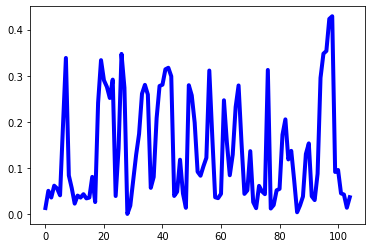

In [124]:
src = cv2.imread("./data/people1.png")

hog = cv2.HOGDescriptor()

dst = hog.compute(src)

plt.plot(dst[::36], color = 'b', linewidth = '4')

In [134]:
src = cv2.imread("./data/people.png")

hog = cv2.HOGDescriptor()
people_detect = cv2.HOGDescriptor_getDefaultPeopleDetector()
hog.setSVMDetector(people_detect)

loc1, weight1 = hog.detect(src) # 아무것도 detect 되지 않음

###########

dst1 = src.copy()
loc2, weight2 = hog.detectMultiScale(src)
for rect in loc2:
    x, y, w, h = rect
    cv2.rectangle(dst1, (x, y), (x+w, y+h), (0,255,0), 2)

###########

dst2 = src.copy()
loc3, weight3 = hog.detectMultiScale(src, winStride = (1,1), padding=(8,8))
for rect in loc3:
    x, y, w, h = rect
    cv2.rectangle(dst2, (x, y), (x+w, y+h), (255,0,0), 2)

cv2.imshow("dst1", dst1)
cv2.imshow("dst2", dst2)
cv2.waitKey()
cv2.destroyAllWindows() 

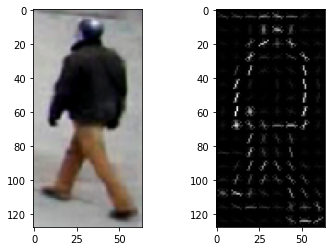

In [9]:
from skimage.feature import hog
import matplotlib.pyplot as plt
import matplotlib.image as mping

src = cv2.imread("./data/people1.png")
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

hog_feature, hog_image = hog(gray, orientations=9, pixels_per_cell= (8,8),
                            cells_per_block = (2,2),
                            block_norm = 'L2-Hys', 
                            transform_sqrt=False,
                            visualize=True,
                            feature_vector=False)

fig = plt.figure()
plt.subplot(121)
plt.imshow(src)

plt.subplot(122)
plt.imshow(hog_image, cmap='gray')